In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/hotel_bookings_str.csv'
df = pd.read_csv(csv_file, delimiter=',')
hotel_data_model = hotel_data_model.drop(hotel_data_model.columns[], axis=1)
df.pop('arrival_year_week')
df.pop('agent')
print(df.head(10))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies meal country market_segment distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled reserved_room_type assigned_room_type  booking_changes deposit_type  days_in_waiting_list customer_type    adr  required_car_parking_spaces  total_of_special_requests reservation_status reservation_status_date  total_stayed_nights  weekend_nights_proportion
0  Resort Hotel            0        342               2015               July                        27                          1                        0                     0       2         0       0   BB     PRT         Direct               Direct                  0                       0                               0                  C                  C                3   No Deposit                   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

Text(0, 0.5, 'Count')

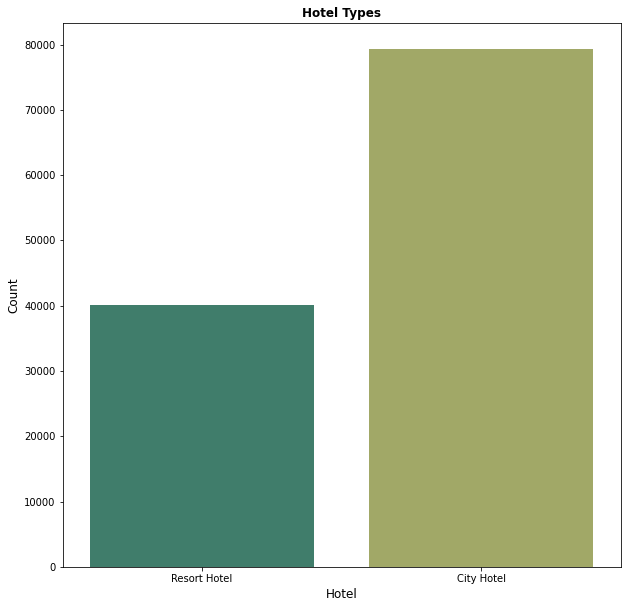

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = df, palette='gist_earth')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Canceled or Not Canceled')

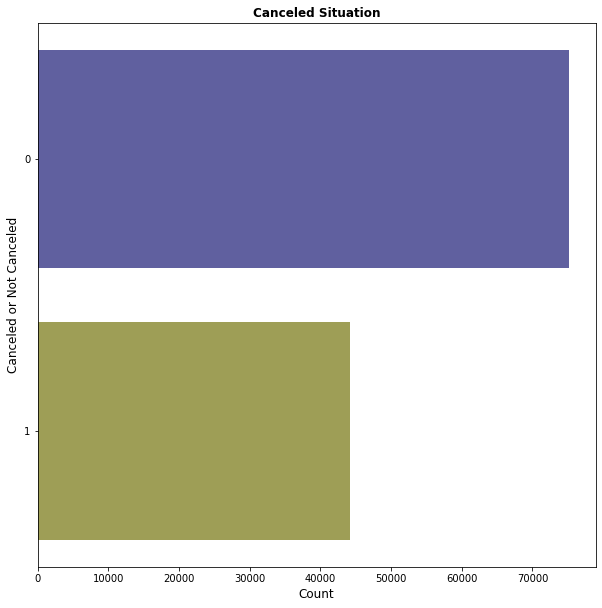

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='is_canceled', data= df, palette='gist_stern', orient = 'v')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

Text(0, 0.5, 'Lead Time')

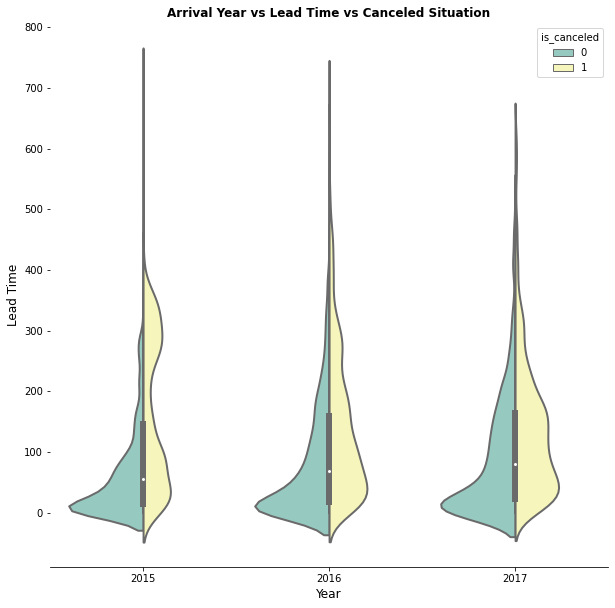

In [ ]:

plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

Text(0, 0.5, 'Lead Time')

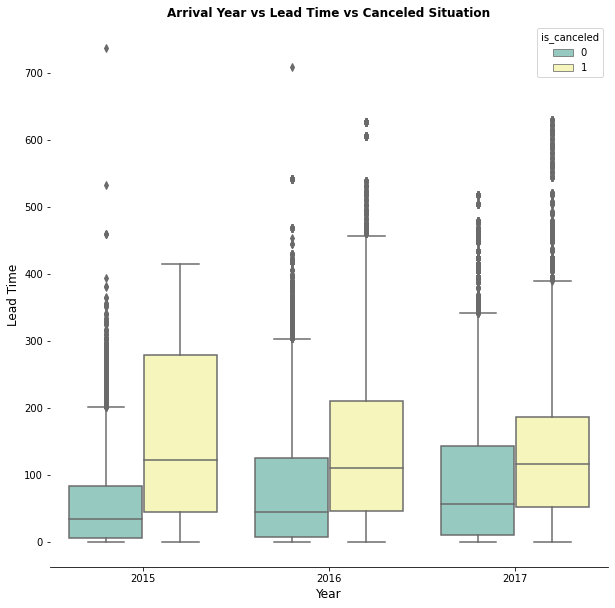

In [ ]:

plt.figure(figsize=(10,10))
sns.boxplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="Set3")
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

In [ ]:
df['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)


Text(0, 0.5, 'Count')

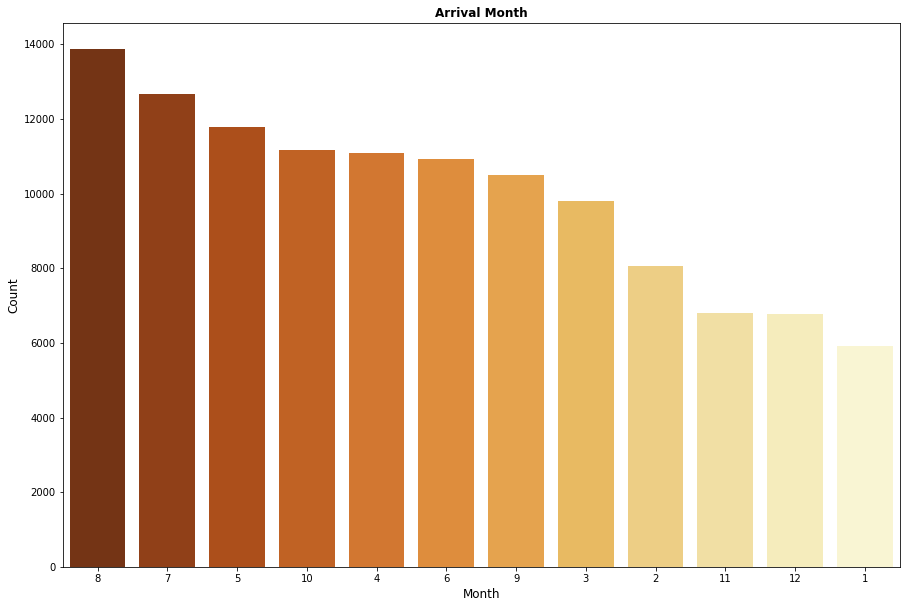

In [ ]:

plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = df,
              order=pd.value_counts(df['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [ ]:
pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    df['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'

In [ ]:
week_function(df['stays_in_weekend_nights'],df['stays_in_week_nights'], df)

Text(0, 0.5, 'Count')

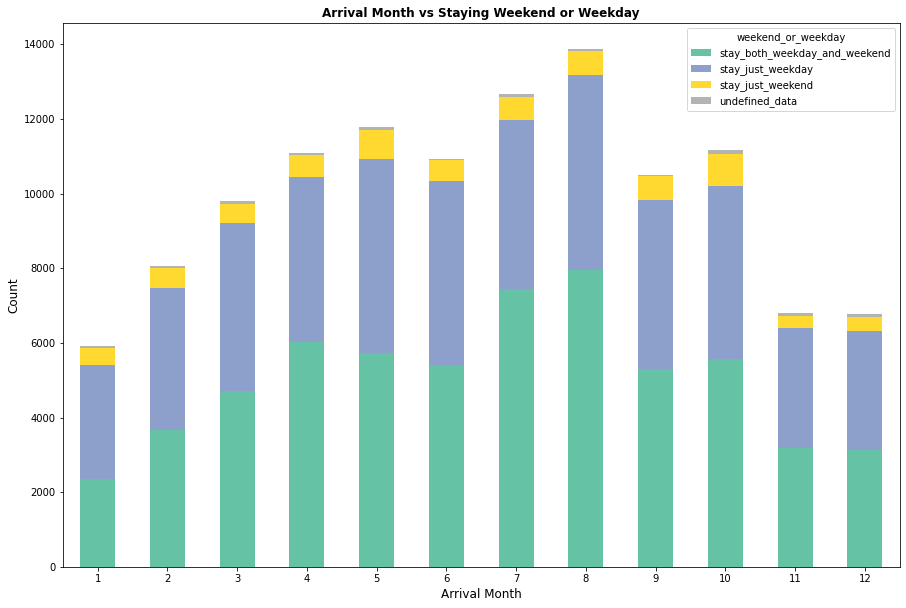

In [ ]:
df['arrival_date_month']= df['arrival_date_month'].astype('int64')
group_data = df.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set2',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

In [ ]:
df['all_children'] = df['children'] + df['babies']
pd.crosstab(df['adults'], df['all_children'], margins=True, margins_name = 'Total').iloc[:10]

all_children,0,1,2,3,9,10,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81560,4658,3369,91,0,2,89680
3,5666,495,41,0,0,0,6202
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


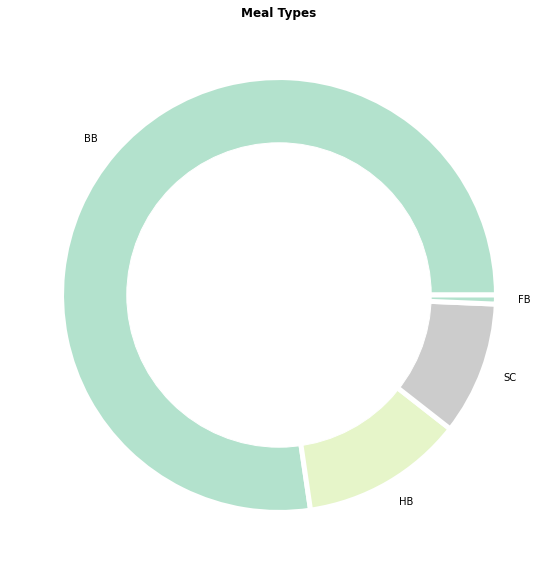

In [ ]:
meal_labels= ['BB','HB', 'SC','FB']
size = df['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

In [ ]:
group_meal_data = df.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC
hotel,,,,
City Hotel,0.67,0.06,0.44,0.89
Resort Hotel,0.33,0.94,0.56,0.11


Text(0, 0.5, 'Count')

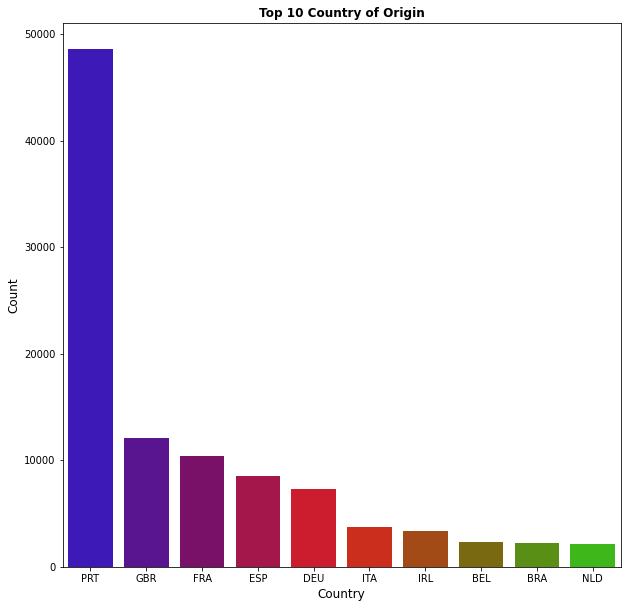

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=df, 
              order=pd.value_counts(df['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)


Text(0, 0.5, 'Count')

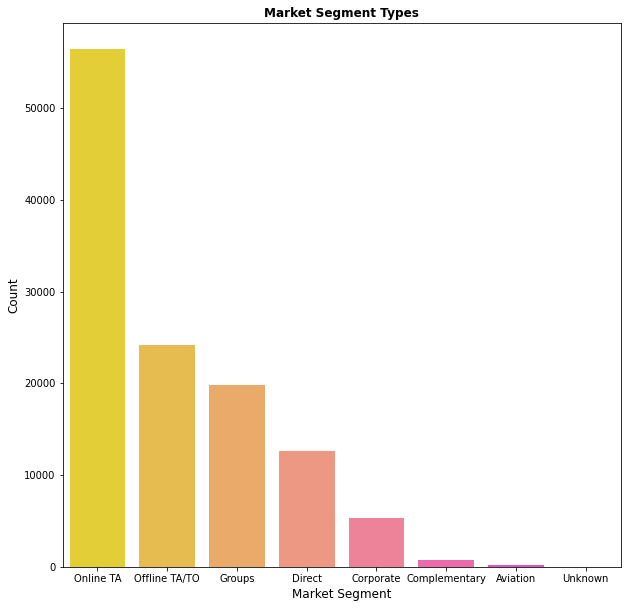

In [ ]:
# `Market_segment` feature exploration

plt.figure(figsize=(10,10))
sns.countplot(df['market_segment'], palette='spring_r', 
              order=pd.value_counts(df['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:

labelencoder = LabelEncoder()
df['hotel'] = labelencoder.fit_transform(df['hotel'])
df['arrival_date_month'] = labelencoder.fit_transform(df['arrival_date_month'])
df['meal'] = labelencoder.fit_transform(df['meal'])
df['country'] = labelencoder.fit_transform(df['country'])
df['market_segment']= labelencoder.fit_transform(df['market_segment'])
df['distribution_channel']=labelencoder.fit_transform(df['distribution_channel'])
df['is_repeated_guest'] = labelencoder.fit_transform(df['is_repeated_guest'])
df['reserved_room_type'] = labelencoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = labelencoder.fit_transform(df['assigned_room_type'])
df['deposit_type'] = labelencoder.fit_transform(df['deposit_type'])

df['customer_type'] = labelencoder.fit_transform(df['customer_type'])
df['reservation_status'] = labelencoder.fit_transform(df['reservation_status'])
df['weekend_or_weekday'] = labelencoder.fit_transform(df['weekend_or_weekday'])

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'total_stayed_nights', 'weekend_nights_proportion', 'weekend_or_weekday', 'all_children'], dtype='object')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stayed_nights,weekend_nights_proportion,weekend_or_weekday,all_children
0,1,0,342,2015,6,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,3,0,0,2,0.0,0,0,1,2015-07-01,0,0.0,3,0
1,1,0,737,2015,6,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,4,0,0,2,0.0,0,0,1,2015-07-01,0,0.0,3,0
2,1,0,7,2015,6,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,0,2,75.0,0,0,1,2015-07-02,1,0.0,1,0
3,1,0,13,2015,6,27,1,0,1,1,0,0,0,59,2,0,0,0,0,0,0,0,0,0,2,75.0,0,0,1,2015-07-02,1,0.0,1,0
4,1,0,14,2015,6,27,1,0,2,2,0,0,0,59,6,3,0,0,0,0,0,0,0,0,2,98.0,0,1,1,2015-07-03,2,0.0,1,0


In [ ]:
hotel_data_categorical = df[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type',
                                     'customer_type','reservation_status', 
                                     'weekend_or_weekday']]

In [ ]:

hotel_data_numerical= df.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type', 
                                       'customer_type','reservation_status',
                                       'weekend_or_weekday'], axis = 1)

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

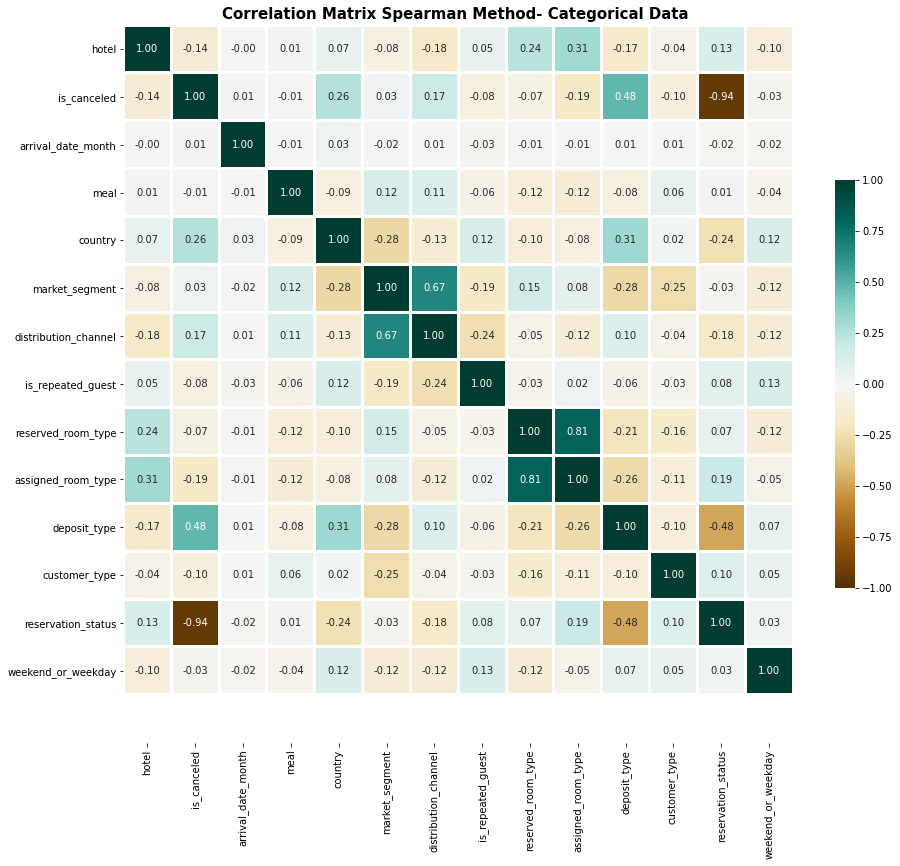

In [ ]:

plt.figure(figsize=(15,15))
corr_categorical=hotel_data_categorical.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix Pearson Method- Numerical Data ')

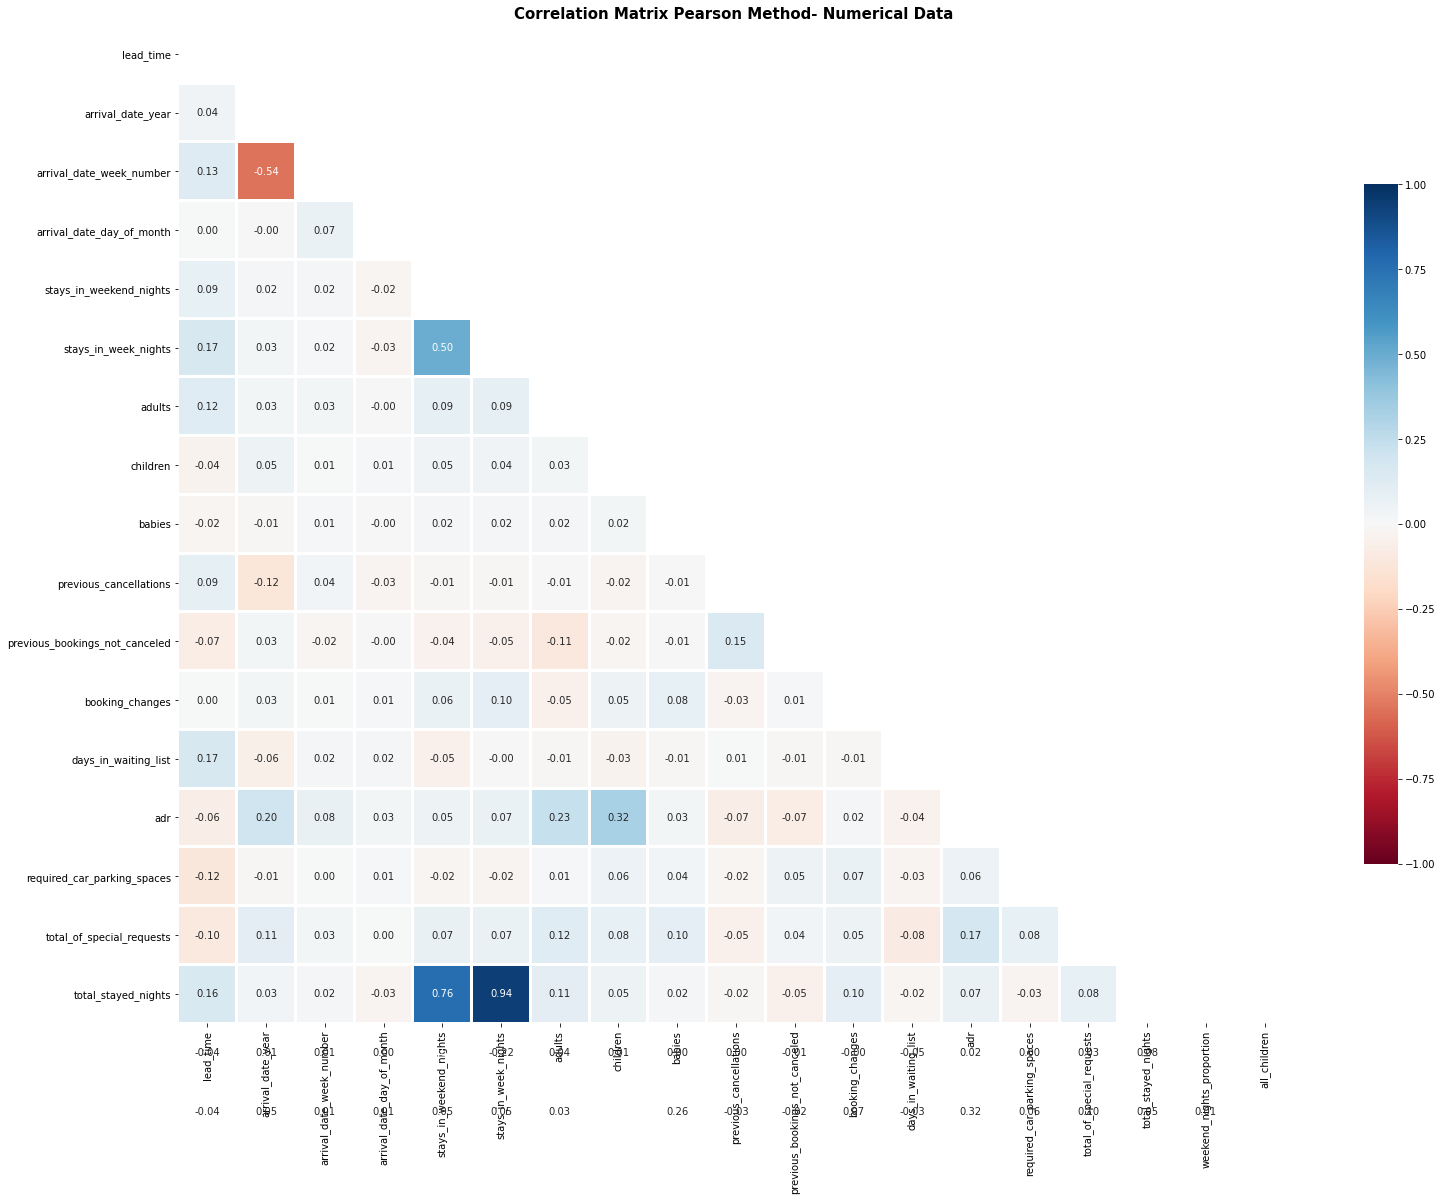

In [ ]:

plt.figure(figsize=(25,25))
corr_numerical=hotel_data_numerical.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')

In [ ]:
corr_mask_categorical = corr_categorical.mask(mask_categorical)
corr_values_categorical = [c for c in corr_mask_categorical.columns if any (corr_mask_categorical[c] > 0.90)]
corr_mask_numerical = corr_numerical.mask(mask_numerical)
corr_values_numerical = [c for c in corr_mask_numerical.columns if any (corr_mask_numerical[c] > 0.90)]
print(corr_values_categorical, corr_values_numerical)

[] ['stays_in_week_nights', 'children']


In [ ]:
df = df.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stayed_nights', 'weekend_nights_proportion', 'weekend_or_weekday', 'all_children'], dtype='object')

In [ ]:
csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/data_numeric_normalized.csv'
df = pd.read_csv(csv_file, delimiter=',')


In [ ]:
hotel_data_tunning = df
y = hotel_data_tunning.iloc[:,1]
X = pd.concat([hotel_data_tunning.iloc[:,0],hotel_data_tunning.iloc[:,2:30]], axis=1)

In [ ]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64


In [ ]:
print(X)

        hotel  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  customer_type     adr  required_car_parking_spaces  total_of_special_requests  total_stayed_nights  weekend_nights_proportion  weekend_or_weekday
0           1        342               2015                   6                        27                          1                        0                     0       2       0     0      135               3                     1                  0                       0                               0                   2                   2                3             0                     0              2    0.00                            0

In [ ]:
params = {
    'criterion': 'giny', 
    'learning_rate': 0.01, 
    'max_depth': 5,
    'n_estimators': 100, 
    'objective': 'binary:logistic', 
}
model = XGBClassifier(parameters=params)
# fit the model
model.fit(X, y)
# perform permutation importance
result = permutation_importance(model, X, y, scoring='accuracy', n_repeats = 5, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()


In [ ]:
for i,v in enumerate(sorted_idx):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 10.00000
Feature: 1, Score: 5.00000
Feature: 2, Score: 14.00000
Feature: 3, Score: 27.00000
Feature: 4, Score: 13.00000
Feature: 5, Score: 9.00000
Feature: 6, Score: 28.00000
Feature: 7, Score: 3.00000
Feature: 8, Score: 21.00000
Feature: 9, Score: 4.00000
Feature: 10, Score: 8.00000
Feature: 11, Score: 7.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 6.00000
Feature: 14, Score: 26.00000
Feature: 15, Score: 16.00000
Feature: 16, Score: 23.00000
Feature: 17, Score: 17.00000
Feature: 18, Score: 18.00000
Feature: 19, Score: 22.00000
Feature: 20, Score: 24.00000
Feature: 21, Score: 19.00000
Feature: 22, Score: 2.00000
Feature: 23, Score: 15.00000
Feature: 24, Score: 1.00000
Feature: 25, Score: 12.00000
Feature: 26, Score: 11.00000
Feature: 27, Score: 20.00000
Feature: 28, Score: 25.00000


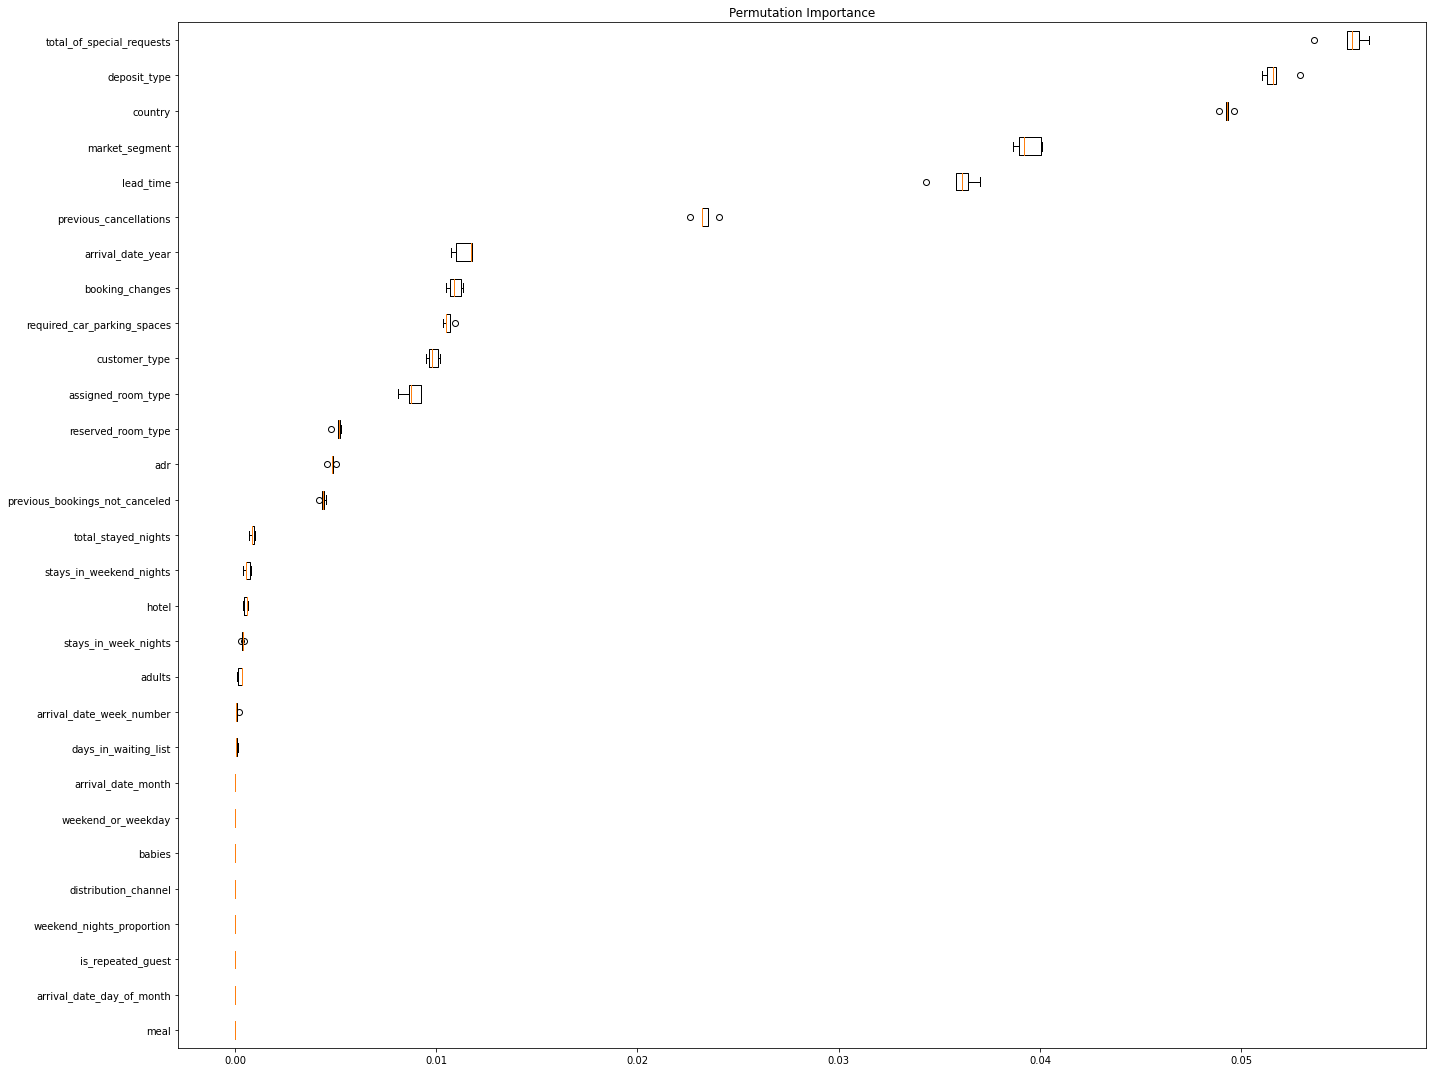

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()